In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv(r"dataset\Train.csv")
df_val = data.sample(frac=0.2, random_state=1)
df_train_notCleaned = data.drop(index=df_val.index)
df_train = df_train_notCleaned.copy()

print(f"df.shape[0]: {data.shape[0]}")
print(f"df_train.shape[0]: {df_train.shape[0]}")
print(f"df_val.shape[0]: {df_val.shape[0]}")

df.shape[0]: 8523
df_train.shape[0]: 6818
df_val.shape[0]: 1705


# Cleaning Phase

In [3]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


we have 1554 product in this train dataset and the other 5 products are in the val dataset

In [4]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,5659.000000,6818.000000,6818.000000,6818.000000,6818.000000
mean,12.862008,0.066256,141.583528,1997.830595,2191.609016
std,4.653398,0.051477,61.944576,8.385614,1702.515307
min,4.555000,0.000000,31.290000,1985.000000,33.955800
25%,8.730000,0.026950,94.719900,1987.000000,856.884600
50%,12.600000,0.054229,143.215400,1999.000000,1821.628800
75%,16.850000,0.095374,185.901600,2004.000000,3095.637100
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
df_train.groupby(['Item_Identifier', 'Outlet_Identifier']).agg(pd.Series.max)

Item_Weight Item_Fat_Content  \
Item_Identifier Outlet_Identifier                                 
DRA12           OUT010                   11.60          Low Fat   
                OUT013                   11.60          Low Fat   
                OUT017                   11.60          Low Fat   
                OUT018                   11.60          Low Fat   
                OUT035                   11.60               LF   
...                                        ...              ...   
NCZ54           OUT019                     NaN          Low Fat   
                OUT027                     NaN          Low Fat   
                OUT045                   14.65          Low Fat   
                OUT046                   14.65          Low Fat   
                OUT049                   14.65          Low Fat   

                                   Item_Visibility    Item_Type  Item_MRP  \
Item_Identifier Outlet_Identifier                                           
DRA12           OUT010                    0.068535  Soft Drinks  143.0154   
                OUT013                    0.040912  Soft Drinks  142.3154   
                OUT017                    0.041178  Soft Drinks  140.3154   
                OUT018                    0.041113  Soft Drinks  142.0154   
                OUT035                    0.000000  Soft Drinks  141.9154   
...                                            ...          ...       ...   
NCZ54           OUT019                    0.145952    Household  160.9552   
                OUT027                    0.082956    Household  164.0552   
                OUT045                    0.083528    Household  162.4552   
                OUT046                    0.083359    Household  161.9552   
                OUT049                    0.083489    Household  161.3552   

                                   Outlet_Establishment_Year Outlet_Size  \
Item_Identifier Outlet_Identifier                                          
DRA12           OUT010                                  1998         NaN   
                OUT013                                  1987        High   
                OUT017                                  2007         NaN   
                OUT018                                  2009      Medium   
                OUT035                                  2004       Small   
...                                                      ...         ...   
NCZ54           OUT019                                  1985       Small   
                OUT027                                  1985      Medium   
                OUT045                                  2002         NaN   
                OUT046                                  1997       Small   
                OUT049                                  1999      Medium   

                                  Outlet_Location_Type        Outlet_Type  \
Item_Identifier Outlet_Identifier                                           
DRA12           OUT010                          Tier 3      Grocery Store   
                OUT013                          Tier 3  Supermarket Type1   
                OUT017                          Tier 2  Supermarket Type1   
                OUT018                          Tier 3  Supermarket Type2   
                OUT035                          Tier 2  Supermarket Type1   
...                                                ...                ...   
NCZ54           OUT019                          Tier 1      Grocery Store   
                OUT027                          Tier 3  Supermarket Type3   
                OUT045                          Tier 2  Supermarket Type1   
                OUT046                          Tier 1  Supermarket Type1   
                OUT049                          Tier 1  Supermarket Type1   

                                   Item_Outlet_Sales  
Item_Identifier Outlet_Identifier                     
DRA12           OUT010                      283.6308  
     

**consider the following Notes:**

[Item_Weight, Item_Fat_Content, Item_Type] depend on **Item_Identifier** only

[Item_Visibility] depend on **both** Item_Identifier and Outlet_Identifier

[Item_MRP] the **range** of it depend on Item_Identifier but it **changes slightly** according to Outlet_Identifier

In [6]:
df_train.groupby(['Outlet_Identifier', 'Item_Identifier']).agg(pd.Series.max)

Item_Weight Item_Fat_Content  \
Outlet_Identifier Item_Identifier                                 
OUT010            DRA12                 11.600          Low Fat   
                  DRA24                 19.350          Regular   
                  DRA59                  8.270          Regular   
                  DRB13                  6.115          Regular   
                  DRB25                 12.300          Low Fat   
...                                        ...              ...   
OUT049            NCY42                  6.380          Low Fat   
                  NCY54                  8.430          Low Fat   
                  NCZ30                  6.590          Low Fat   
                  NCZ42                 10.500               LF   
                  NCZ54                 14.650          Low Fat   

                                   Item_Visibility    Item_Type  Item_MRP  \
Outlet_Identifier Item_Identifier                                           
OUT010            DRA12                   0.068535  Soft Drinks  143.0154   
                  DRA24                   0.066832  Soft Drinks  163.8868   
                  DRA59                   0.214125  Soft Drinks  183.9924   
                  DRB13                   0.011791  Soft Drinks  189.0530   
                  DRB25                   0.116261  Soft Drinks  107.0938   
...                                            ...          ...       ...   
OUT049            NCY42                   0.015186    Household  144.9470   
                  NCY54                   0.177971    Household  174.0422   
                  NCZ30                   0.026226    Household  119.0098   
                  NCZ42                   0.011305    Household  235.5248   
                  NCZ54                   0.083489    Household  161.3552   

                                   Outlet_Establishment_Year Outlet_Size  \
Outlet_Identifier Item_Identifier                                          
OUT010            DRA12                                 1998         NaN   
                  DRA24                                 1998         NaN   
                  DRA59                                 1998         NaN   
                  DRB13                                 1998         NaN   
                  DRB25                                 1998         NaN   
...                                                      ...         ...   
OUT049            NCY42                                 1999      Medium   
                  NCY54                                 1999      Medium   
                  NCZ30                                 1999      Medium   
                  NCZ42                                 1999      Medium   
                  NCZ54                                 1999      Medium   

                                  Outlet_Location_Type        Outlet_Type  \
Outlet_Identifier Item_Identifier                                           
OUT010            DRA12                         Tier 3      Grocery Store   
                  DRA24                         Tier 3      Grocery Store   
                  DRA59                         Tier 3      Grocery Store   
                  DRB13                         Tier 3      Grocery Store   
                  DRB25                         Tier 3      Grocery Store   
...                                                ...                ...   
OUT049            NCY42                         Tier 1  Supermarket Type1   
                  NCY54                         Tier 1  Supermarket Type1   
                  NCZ30                         Tier 1  Supermarket Type1   
                  NCZ42                         Tier 1  Supermarket Type1   
                  NCZ54                         Tier 1  Supermarket Type1   

                                   Item_Outlet_Sales  
Outlet_Identifier Item_Identifier                     
OUT010            DRA12                     283.6308  
     

**consider the following Notes:**

[Outlet_Establishment_Year,	Outlet_Size	Outlet_Location_Type, Outlet_Type] depend on **Outlet_Identifier** only

[Item_Outlet_Sales] depend on **both** Item_Identifier and Outlet_Identifier

In [7]:
print("Number of unique elements for every object columns:")
for column in df_train.select_dtypes(include='object').columns:
    print(f"{column}: {len(df_train[column].unique())}")
    print(f"Unique Values: {df_train[column].unique()}")
    print("==========")

Number of unique elements for every object columns:
Item_Identifier: 1554
Unique Values: ['FDA15' 'DRC01' 'FDN15' ... 'FDW58' 'FDG40' 'FDM38']
Item_Fat_Content: 5
Unique Values: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type: 16
Unique Values: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier: 10
Unique Values: ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Size: 4
Unique Values: ['Medium' nan 'High' 'Small']
Outlet_Location_Type: 3
Unique Values: ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type: 4
Unique Values: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


**consider the following Notes:**

**Item_Identifier:** Actually we don't need it in modelling but we realy need it during preprocessing so we don't need to encode it now

**Item_Fat_Content:** can be encoded by ordinal encoding methode

**Item_Type:** can be encoded by target encoding methode

**Outlet_Identifier:** Actually we don't need it in modelling but we realy need it during preprocessing so we don't need to encode it now

**Outlet_Size:** can be encoded by ordinal encoding methode

**Outlet_Location_Type:** can be encoded by ordinal encoding methode

**Outlet_Type:** can be encoded by target encoding methode

Let's start by **ordinal encoding** on **Item_Fat_Content**,   **Outlet_Size** and **Outlet_Location_Type**

In [8]:
def str2int_fat(x, default=None):
    str2int_dict = {'low fat':1, 'low_fat':1, 'lf':1, 'regular':2, 'reg':2}
    return str2int_dict.get(x.lower(), default)

df_train.Item_Fat_Content = df_train.Item_Fat_Content.map(lambda x:str2int_fat(x, None), na_action='ignore')

In [9]:
def str2int_size(x, default=None):
    str2int_dict = {'small':0, 's':0, 'medium':1, 'm':1, 'high':2, 'h':2}
    return str2int_dict.get(x.lower(), default)

df_train.Outlet_Size = df_train.Outlet_Size.map(lambda x:str2int_size(x, None), na_action='ignore')

In [10]:
def str2int_location(x, default=None):
    str2int_dict = {'tier 1':1, 'tier_1':1, 't1':1, 'tier 2':2, 'tier_2':2, 't2':2, 'tier 3':3, 'tier_3':3, 't3':3}
    return str2int_dict.get(x.lower(), default)

df_train.Outlet_Location_Type = df_train.Outlet_Location_Type.map(lambda x:str2int_location(x, None), na_action='ignore')

In [11]:
print("Number of unique elements for every labeled columns:")
for column in ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type']:
    print(f"Unique Values: {df_train[column].unique()}")
    print("==========")

Number of unique elements for every labeled columns:
Unique Values: [1 2]
Unique Values: [ 1. nan  2.  0.]
Unique Values: [1 3 2]


OK, we have done this step successfully

Let's Move to missing values treatment step

In [12]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1159
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1911
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**consider the following notes:**

There is 1159 cell is null for the item_weight column

Item_Weight doesn't change for the same product because it depends on product identifier not outlet identifier

Then we can fill item_weight Nans by the weight that this Item_Identifier has in another row (another outlet)

In [13]:
n_NA_Weight_Products = df_train.groupby(['Item_Identifier'])['Item_Weight'].agg(pd.Series.median).isnull().sum()
print(f"Note there is {n_NA_Weight_Products} products we don't know its weight")

Note there is 7 products we don't know its weight


In [14]:
NA_Weight_Products = df_train.groupby(['Item_Identifier'])['Item_Weight'].agg(pd.Series.median).isnull()
print("Products that we don't know its weight")
for Item_Identifier in NA_Weight_Products[NA_Weight_Products].index:
    print(Item_Identifier, ": ",df_train.query(f"Item_Identifier == '{Item_Identifier}'").shape[0])

Products that we don't know its weight
DRH11 :  1
FDE52 :  1
FDK57 :  1
FDM27 :  2
FDP15 :  1
FDQ04 :  1
FDQ60 :  1


There is only one sample for each of these products

In [15]:
Item_Weight = df_train.groupby(['Item_Identifier'])['Item_Weight'].agg(pd.Series.median)
def fillna_weight(row, default=100):
    row['Item_Weight'] = Item_Weight.get(row['Item_Identifier'], default)
    return row
df_train = df_train.apply(fillna_weight, axis=1)

Repeat the same methodolgy for outlet_size 

In [16]:
n_NA_Size_Outlets = df_train.groupby(['Outlet_Identifier'])['Outlet_Size'].median().isnull().sum()
print(f"Note there is {n_NA_Size_Outlets} outlets we don't know its size")

Note there is 3 outlets we don't know its size


In [17]:
NA_Size_Outlets = df_train.groupby(['Outlet_Identifier'])['Outlet_Size'].median().isnull()
print("Products that we don't know its weight")
for Outlet_Identifier in NA_Size_Outlets[NA_Size_Outlets].index:
    print(Outlet_Identifier, ": ",df_train.query(f"Outlet_Identifier == '{Outlet_Identifier}'").shape[0])

Products that we don't know its weight
OUT010 :  428
OUT017 :  732
OUT045 :  751


In [18]:
df_train.Outlet_Size.isnull().sum() == (428 + 732 + 751)

True

Unfortunately, the Nan value here is because it doesn't exist but for item_wieght it was because it doesn't recorded

So we can't apply the same methodolgy and we have to approximate it late

Let's gain more info to write the more suitable function

In [19]:
df_train[df_train.Outlet_Size.isnull()]['Outlet_Type'].unique()

array(['Grocery Store', 'Supermarket Type1'], dtype=object)

All the nulls are for 'Grocery Store' and 'Supermarket Type1'

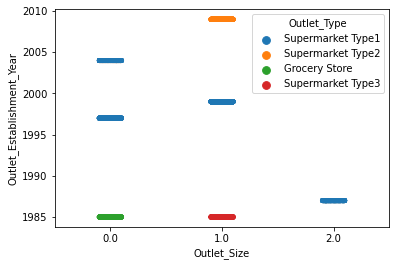

In [20]:
sns.stripplot(data = df_train, x ='Outlet_Size', y='Outlet_Establishment_Year', hue='Outlet_Type');

In [21]:
df_train[df_train['Outlet_Size'].isnull()]['Outlet_Establishment_Year'].unique()

array([1998, 2002, 2007], dtype=int64)

In [22]:
df_train.query("Outlet_Establishment_Year == 1998").Outlet_Type.unique() # this will be filled by zero because all grocery stores that we have is small

array(['Grocery Store'], dtype=object)

In [23]:
df_train.query("Outlet_Establishment_Year == 2002").Outlet_Type.unique() # this will be filled by zero because all Supermarket Type1 that established after 2000 is small

array(['Supermarket Type1'], dtype=object)

In [24]:
df_train.query("Outlet_Establishment_Year == 2007").Outlet_Type.unique() # this will be filled by zero because all Supermarket Type1 that established after 2000 is small

array(['Supermarket Type1'], dtype=object)

The above lines of codes says that all null values for outlet_size is 0 but we have to write a general function acoording to the above plot

In [25]:
def fillna_size(row, default=None):
    """
    This is a general function that describe the above graph
    We made it general to be suited for val data also
    """
    if row['Outlet_Type'] == 'Supermarket Type1':
        if row['Outlet_Establishment_Year'] > 2000: row['Outlet_Size'] = 0
        elif row['Outlet_Establishment_Year'] > 1997.5: row['Outlet_Size'] = 1
        elif row['Outlet_Establishment_Year'] > 1995: row['Outlet_Size'] = 0
        else: row['Outlet_Size'] = 2
    else:
        d = {'Grocery Store':0, 'Supermarket Type2':1, 'Supermarket Type3':1}
        row['Outlet_Size'] = d.get(row['Outlet_Type'], default)
    
    return row

df_train = df_train.apply(lambda x: fillna_size(x, None), axis=1)

Let's do some feature engineering to encode Item_type and Outlet_type

In [26]:
df_train_temp = df_train.copy()

In [27]:
temp = df_train_temp.groupby('Item_Type')[['Item_Weight','Item_Fat_Content']].mean()
str2int_Item_Type = ((temp.iloc[:,0]**3) * (temp.iloc[:,1] ** 3)).sort_values().astype(int)
df_train_temp.Item_Type = df_train_temp.Item_Type.map(str2int_Item_Type)

In [28]:
scaler = StandardScaler()
df_train_temp[['Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type']] = scaler.fit_transform(df_train_temp[['Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type']])
str2int_Outelet_Type = df_train_temp.groupby('Outlet_Type')[['Outlet_Establishment_Year','Outlet_Size', 'Outlet_Location_Type']].mean().sum(axis=1)
df_train_temp.Outlet_Type = df_train_temp.Outlet_Type.map(str2int_Outelet_Type)

In [29]:
df_train[['Item_Type', 'Outlet_Type']] = df_train_temp[['Item_Type', 'Outlet_Type']]

In [30]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1,0.016047,6595,249.8092,OUT049,1999,1,1,-0.235608,3735.1380
1,DRC01,5.92,2,0.019278,2644,48.2692,OUT018,2009,1,3,3.067833,443.4228
2,FDN15,17.50,1,0.016760,8601,141.6180,OUT049,1999,1,1,-0.235608,2097.2700
3,FDX07,19.20,2,0.000000,7661,182.0950,OUT010,1998,0,3,-1.672425,732.3800
4,NCD19,8.93,1,0.000000,2486,53.8614,OUT013,1987,2,3,-0.235608,994.7052


Last step is to encode ITem_Identifier and Outlet_Identifier

As we said that item identifier, Item weight, Item_Fat_Content and Item_Type aren't changed for the same product

So If we tried to use them to encode the Item_Identifier it will be good thing

But let's build our model on this data as it is without any changes

In [31]:
df_train.groupby('Item_Identifier').median()[['Item_Weight', 'Item_Fat_Content', 'Item_Type']]

,Item_Weight,Item_Fat_Content,Item_Type
Item_Identifier,,,
DRA12,11.600,1.0,2644.0
DRA24,19.350,2.0,2644.0
DRA59,8.270,2.0,2644.0
DRB01,7.390,1.0,2644.0
DRB13,6.115,2.0,2644.0
...,...,...,...
NCZ30,6.590,1.0,2486.0
NCZ41,19.850,1.0,2230.0
NCZ42,10.500,1.0,2486.0


In [32]:
df_train_temp = df_train.copy()

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train_temp[['Item_Weight', 'Item_Fat_Content', 'Item_Type', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']] = scaler.fit_transform(df_train_temp[['Item_Weight', 'Item_Fat_Content', 'Item_Type', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']])

In [34]:
handle_item = df_train_temp.groupby('Item_Identifier').median()[['Item_Weight', 'Item_Fat_Content', 'Item_Type']].sum(1)
handle_outlet = df_train_temp.groupby('Outlet_Identifier').median()[['Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']].sum(1)

In [35]:
df_train.Item_Identifier = df_train.Item_Identifier.map(handle_item)
df_train.Outlet_Identifier = df_train.Outlet_Identifier.map(handle_outlet)

In [36]:
df_val.Item_Identifier = df_val.Item_Identifier.map(handle_item)
df_val.Outlet_Identifier = df_val.Outlet_Identifier.map(handle_outlet)

In [37]:
X_train = df_train.drop(['Item_Weight', 'Item_Fat_Content', 'Item_Type', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'], axis=1)
y_train = df_train['Item_Outlet_Sales']
X_train.fillna(0, inplace=True)

In [38]:
X_val = df_val.drop(['Item_Weight', 'Item_Fat_Content', 'Item_Type', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'], axis=1)
y_val = df_val['Item_Outlet_Sales']
X_val.fillna(0, inplace=True)

In [39]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [40]:
print(model.score(X_train, y_train))
print(model.score(X_val, y_val))

0.9369972617948652
0.5514273324031779


Finally we have cleaned numerical data Let's explore it

# Exploring Phase

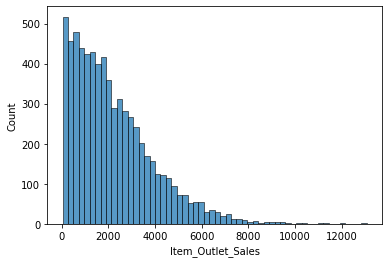

In [41]:
sns.histplot(df_train["Item_Outlet_Sales"]);

Target variable is not normalized

Most of products are sold in 4 outlets only


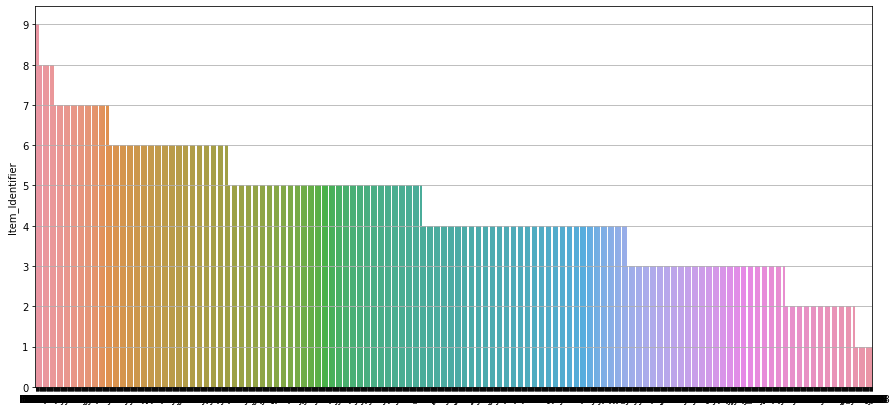

In [69]:
feq_t = df_train_notCleaned.Item_Identifier.value_counts()
ax = sns.barplot(x = feq_t.index, y = feq_t)
ax.figure.set_size_inches(15,7)
ax.set_yticks(range(10))
ax.grid(True, axis='y')
print(f"Most of products are sold in {feq_t.mode()[0]} outlets only")

Most of products are sold in 4 outlets only


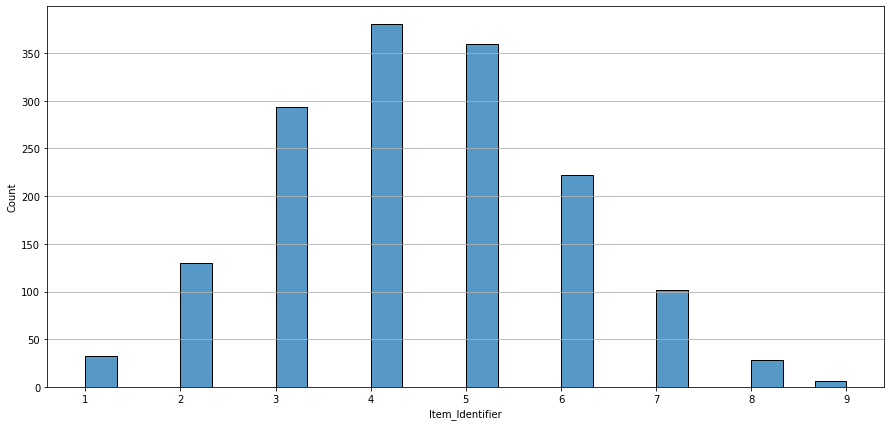

In [70]:
feq_t = df_train_notCleaned.Item_Identifier.value_counts()
ax = sns.histplot(feq_t)
ax.figure.set_size_inches(15,7)
ax.grid(True, axis='y')
print(f"Most of products are sold in {feq_t.mode()[0]} outlets only")

2 of outlets buy about 400 products but the others buy around 750 products


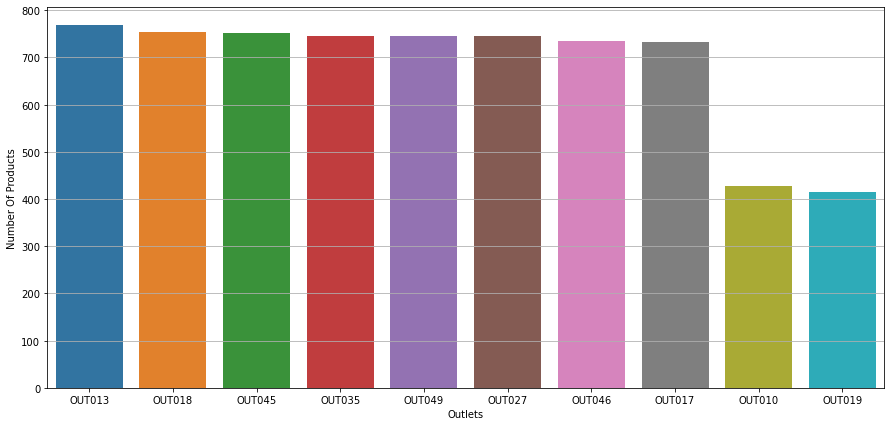

In [71]:
feq_t = df_train_notCleaned.Outlet_Identifier.value_counts()
ax = sns.barplot(x = feq_t.index, y = feq_t)
ax.figure.set_size_inches(15,7)
ax.set_ylabel("Number Of Products")
ax.set_xlabel("Outlets")
ax.grid(True, axis='y')
print(f"2 of outlets buy about 400 products but the others buy around 750 products")

The above figures tells us that the some features in the data is imbalanced and we have to rebalance it

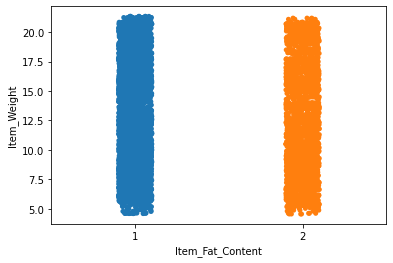

In [45]:
sns.stripplot(data=df_train, x="Item_Fat_Content", y="Item_Weight");

Ok there is no relation between "Item_Fat_Content" and "Item_Weight"

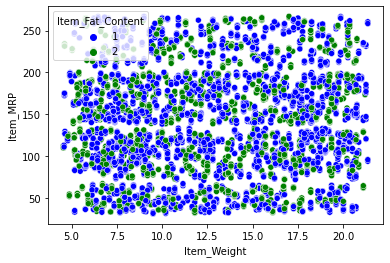

In [46]:
sns.scatterplot(data=df_train, x="Item_Weight", y="Item_MRP", hue="Item_Fat_Content", palette=['blue', 'green']);

Ok there is no relation between "Item_Fat_Content", "Item_Weight" and "Item_MRP"

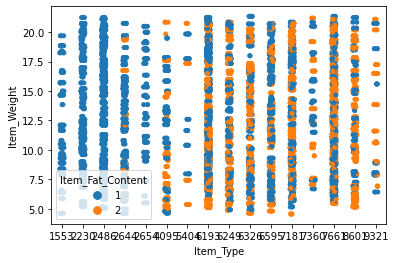

In [47]:
sns.stripplot(data=df_train, x="Item_Type", y="Item_Weight", hue="Item_Fat_Content");

It seems that some Item_Types is completely low fat and this fat content increases gradually

# Moeling Phase

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures


data = pd.read_csv(r"dataset\Train.csv")
df_val = data.sample(frac=0.2, random_state=1)
df_train = data.drop(index=df_val.index)
X_train, y_train = df_train.drop("Item_Outlet_Sales", axis=1), df_train["Item_Outlet_Sales"]
X_valid, y_valid = df_val.drop("Item_Outlet_Sales", axis=1), df_val["Item_Outlet_Sales"]



model = RandomForestRegressor(random_state=1)
class CatOrdinalEncodingTransformer():
    def __init__(self, default=0):
        self.default=default

    def transform(self,X,y=None):
        X = X.copy()
        X.Item_Fat_Content = X.Item_Fat_Content.map(lambda x:self.str2int_fat.get(x.lower(), self.default), na_action='ignore')
        X.Outlet_Size = X.Outlet_Size.map(lambda x:self.str2int_size.get(x.lower(), self.default), na_action='ignore')
        X.Outlet_Location_Type = X.Outlet_Location_Type.map(lambda x:self.str2int_location.get(x.lower(), self.default), na_action='ignore')
        return X

    def fit(self, X, y=None):
        self.str2int_fat = {'low fat':1, 'low_fat':1, 'lf':1, 'regular':2, 'reg':2}
        self.str2int_size = {'small':1, 's':1, 'medium':2, 'm':2, 'high':3, 'h':3}
        self.str2int_location = {'tier 1':1, 'tier_1':1, 't1':1, 'tier 2':2, 'tier_2':2, 't2':2, 'tier 3':3, 'tier_3':3, 't3':3}
        return self
catOrdinalEncoding = Pipeline([
    ("catOrdinalEncoding", CatOrdinalEncodingTransformer())
])

class FillNaTransformer():
    def __init__(self, default=0):
        self.default=default

    def __fillna_size(self, row, default=None):
        """
        This is a general function that describe the above graph
        We made it general to be suited for val data also
        """
        if row['Outlet_Type'] == 'Supermarket Type1':
            if row['Outlet_Establishment_Year'] > 2000: row['Outlet_Size'] = 1
            elif row['Outlet_Establishment_Year'] > 1997.5: row['Outlet_Size'] = 2
            elif row['Outlet_Establishment_Year'] > 1995: row['Outlet_Size'] = 1
            else: row['Outlet_Size'] = 3
        else:
            d = {'Grocery Store':1, 'Supermarket Type2':2, 'Supermarket Type3':2}
            row['Outlet_Size'] = d.get(row['Outlet_Type'], default)

        return row
    
    def __fillna_weight(self, row, default=0):
        row['Item_Weight'] = self.Item_Weight.get(row['Item_Identifier'], self.default)
        return row
    
    def transform(self,X,y=None):
        X = X.copy()
        X = X.apply(lambda row: self.__fillna_weight(row, self.default), axis=1)
        X = X.apply(lambda row: self.__fillna_size(row, self.default), axis=1)
        return X

    def fit(self, X, y=None):
        self.Item_Weight = X.groupby(['Item_Identifier'])['Item_Weight'].agg(pd.Series.median)
        return self
fillNA = Pipeline([
    ("fillNA", FillNaTransformer(0))
])

class CatNominalEncodingTransformer():
    def __init__(self, default=0):
        self.default=default
    
    def __self_mul(self, df):
        m = 1
        for col in df:
            m = m * df[col]
        return m
    
    def transform(self,X,y=None):
        X = X.copy()
        X.Item_Type = X.Item_Type.map(self.str2int_Item_Type)
        X.Outlet_Type = X.Outlet_Type.map(self.str2int_Outelet_Type)
        return X

    def fit(self, X, y=None):
        X = X.copy()
        scaler = StandardScaler()
        cols = ['Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type']
        X[cols] = scaler.fit_transform(X[cols])
        self.str2int_Outelet_Type = X.groupby('Outlet_Type')[cols].mean().sum(axis=1)
        
        temp = X.groupby('Item_Type')[['Item_Weight','Item_Fat_Content']].mean()
        temp = temp**3
        self.str2int_Item_Type = self.__self_mul(temp).astype(int)

        return self
catNominalEncoding = Pipeline([
    ("catNominalEncoding", CatNominalEncodingTransformer())
])

class IdentifierEncodingTransformer():
    def __init__(self, default=0):
        self.default=default

    def transform(self,X,y=None):
        X = X.copy()

        X.Item_Identifier = X.Item_Identifier.map(self.handle_item)
        X.Outlet_Identifier = X.Outlet_Identifier.map(self.handle_outlet)

        return X

    def fit(self, X, y=None):
        X = X.copy()

        self.handle_item = (X.groupby('Item_Identifier').median()[['Item_Weight', 'Item_Fat_Content', 'Item_Type']] * [7,5,2]).sum(1)
        self.handle_outlet = (X.groupby('Outlet_Identifier').median()[['Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']] * [2,1,1,2]).sum(1)
        return self
identifierEncoding = Pipeline([
    ("identifierEncoding", IdentifierEncodingTransformer())
])


class TempTransformer():
    def __init__(self, default=0):
        self.default=default

    def transform(self,X,y=None):
        X = X.copy()
        cols0=['Item_Weight', 'Item_Fat_Content', 'Item_Type', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
        cols1=['Outlet_Identifier', 'Item_Identifier']
        X.drop(columns=cols0, inplace=True)
        X.fillna(self.means, inplace=True)

        return X

    def fit(self, X, y=None):
        self.means = {}
        for col in X.select_dtypes(exclude='object').columns:
            self.means[col] = X[col].mean()
        return self

In the above cell we have reapted all the cleaning steps model it in the pipeline

In [49]:
preprocessing0 = Pipeline([('catOrdinalEncoding', CatOrdinalEncodingTransformer())
                              ,('fillNA', FillNaTransformer())
                              ,('catNominalEncoding', CatNominalEncodingTransformer())
                              ,('identifierEncoding', IdentifierEncodingTransformer())
                              ,('TempTransformer', TempTransformer())
                              ,('scaling', StandardScaler())
#                               ,('poly', PolynomialFeatures(degree=6))
                             ])

X_train_tranformed = preprocessing0.fit_transform(X_train)
X_valid_tranformed = preprocessing0.transform(X_valid)

In [50]:
from sklearn.feature_selection import mutual_info_regression

mi_scores = mutual_info_regression(X_train_tranformed, y_train)
mi_scores = pd.Series(mi_scores, name="MI Scores") # , index=X_train_tranformed.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

2    0.695078
3    0.252027
0    0.076424
1    0.075246
Name: MI Scores, dtype: float64

In [51]:
scores = []

def tryModels(estimators, preprocessing,X_train, X_valid, y_train, y_valid):
    X_train = preprocessing.fit_transform(X_train)
    X_valid = preprocessing.transform(X_valid)
    for estimator in estimators:
        print(f"{estimator}")
        estimator.fit(X_train, y_train)
        y_train_estimated = estimator.predict(X_train)
        y_valid_estimated = estimator.predict(X_valid)

        r2_train = r2_score(y_train, y_train_estimated)
        r2_valid = r2_score(y_valid, y_valid_estimated)
        
        mae_train = mean_absolute_error(y_train, y_train_estimated)
        mae_valid = mean_absolute_error(y_valid, y_valid_estimated)


        print(f'r2_train: {r2_train}')
        print(f'r2_valid: {r2_valid}')
        
        print(f'mae_train: {mae_train}')
        print(f'mae_valid: {mae_valid}')
        scores.append((estimator, r2_valid))
    return estimators

def custom_croos_validation(estimator, data, y_name, preprocessing, fit_params = {}, xgb=False):
    R2_valid_li = []

    X_data = data.drop(columns=y_name)
    y_data = data[y_name]

    for train_index, valid_index in KFold(shuffle=True, random_state=20).split(data):
        X_train_cv, X_valid_cv, y_train_cv, y_valid_cv = X_data.iloc[train_index], X_data.iloc[valid_index], y_data.iloc[train_index], y_data.iloc[valid_index]

        X_train_cv_tranformed = preprocessing.fit_transform(X_train_cv)
        X_valid_cv_tranformed = preprocessing.transform(X_valid_cv)
        
        xgb_fit_params = {'eval_set':[(X_valid_cv_tranformed, y_valid_cv)]} if xgb else {}
        estimator.fit(X_train_cv_tranformed, y_train_cv , **xgb_fit_params,**fit_params)

        print(estimator.score(X_train_cv_tranformed, y_train_cv))
        print(estimator.score(X_valid_cv_tranformed, y_valid_cv))
        R2_valid_li.append(estimator.score(X_valid_cv_tranformed, y_valid_cv))

        print('------------------')
    return np.mean(R2_valid_li), np.std(R2_valid_li)

In [52]:
preprocessing1 = Pipeline([('catOrdinalEncoding', CatOrdinalEncodingTransformer())
                              ,('fillNA', FillNaTransformer())
                              ,('catNominalEncoding', CatNominalEncodingTransformer())
                              ,('identifierEncoding', IdentifierEncodingTransformer())
                              ,('TempTransformer', TempTransformer())
                              ,('scaling', StandardScaler())
                              ,('poly', PolynomialFeatures(degree=6))
                             ])
LR = LinearRegression()
custom_croos_validation(LR, data, "Item_Outlet_Sales", preprocessing1)

0.5440830370763944
0.5247196291973277
------------------
0.5496555619411589
0.5017025565832121
------------------
0.5452532404355601
0.511001617641416
------------------
0.5390773302704334
0.538746763833656
------------------
0.5468297394652955
0.5018843155058379
------------------


(0.5156109765522899, 0.01429226199890176)

In [53]:
preprocessing2 = Pipeline([('catOrdinalEncoding', CatOrdinalEncodingTransformer())
                              ,('fillNA', FillNaTransformer())
                              ,('catNominalEncoding', CatNominalEncodingTransformer())
                              ,('identifierEncoding', IdentifierEncodingTransformer())
                              ,('TempTransformer', TempTransformer())
                              ,('scaling', StandardScaler())
                              ,('poly', PolynomialFeatures(degree=6))
                             ])
LR = Ridge()
custom_croos_validation(LR, data, "Item_Outlet_Sales", preprocessing2)

0.5440064805468683
0.5251974406509933
------------------
0.5495807464604345
0.5018326742827348
------------------
0.5451752212245397
0.5112820970729519
------------------
0.5390049701048205
0.5386306883213955
------------------
0.5467580880110117
0.5013137562267316
------------------


(0.5156513313109614, 0.014386039074958112)

Let's do Grid Search for Rondom Forest

In [54]:
param_grid={
#             'max_features':range(2,5,1)
#             ,'max_depth':range(1,20, 2)\
            'min_samples_split': range(2,102, 10)\
            ,'min_samples_leaf':range(1,101, 10)\
#             ,'max_samples':np.arange(0.1,1,0.1)
           }
GS = GridSearchCV(RandomForestRegressor(oob_score=True, max_depth=9, max_features=3, max_samples=0.8), param_grid=param_grid, scoring='r2', n_jobs=-1, cv=5, return_train_score=True)

In [55]:
X_data = data.drop(columns="Item_Outlet_Sales")
y_data = data["Item_Outlet_Sales"]
X_data_tranformed = preprocessing0.fit_transform(X_data)

GS.fit(X_data_tranformed, y_data)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=9, max_features=3,
                                             max_samples=0.8, oob_score=True),
             n_jobs=-1,
             param_grid={'min_samples_leaf': range(1, 101, 10),
                         'min_samples_split': range(2, 102, 10)},
             return_train_score=True, scoring='r2')

In [56]:
GS.best_params_

{'min_samples_leaf': 11, 'min_samples_split': 22}

In [57]:
GS.best_score_

0.5890550464201295

In [58]:
GS.best_estimator_.oob_score_

0.5926885101935147

In [59]:
RFR1 = RandomForestRegressor(max_depth=9, max_features=3, max_samples=0.8, min_samples_leaf= 11, min_samples_split= 52,random_state=1)
custom_croos_validation(RFR1, data, "Item_Outlet_Sales", preprocessing0)

0.6296865727426282
0.6017955626321818
------------------
0.6391330815084321
0.5654920013007751
------------------
0.6315214126331573
0.5930980435714317
------------------
0.6224483259088247
0.6059163279821647
------------------
0.6323976051897132
0.584139227758333
------------------


(0.5900882326489773, 0.014401488775291422)

In [60]:
RFR2 = RandomForestRegressor(max_depth=9, max_features=3, max_samples=0.7, min_samples_split= 100,random_state=1, oob_score=True)
custom_croos_validation(RFR2, data, "Item_Outlet_Sales", preprocessing0)

0.6172954120268317
0.6007471621187017
------------------
0.625840740185134
0.567782410494138
------------------
0.6188879115795274
0.5902320753977608
------------------
0.604140290082384
0.598095523324023
------------------
0.6168768450702935
0.5771189252449116
------------------


(0.586795219315907, 0.012564100641249189)

RFR1 is better

Let's jump to XGBRegressor

Best score: 0.5970158627048887 with lr= 0.36999999999999994


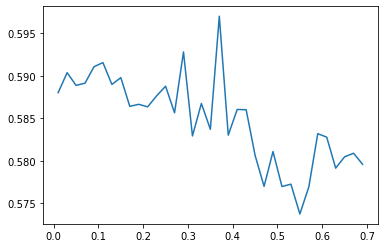

In [61]:
def get_score(lr):
    my_model = XGBRegressor(n_estimators= 500, learning_rate= lr) # Your code here
    my_model.fit(X_train_tranformed, y_train, eval_set=[(X_valid_tranformed, y_valid)], verbose=False, early_stopping_rounds=5)
    r2 = my_model.score(X_valid_tranformed, y_valid)
    return r2

scores = {lr:get_score(lr) for lr in np.arange(0.01, 0.705, 0.02)}

sns.lineplot(y= scores.values(), x= scores.keys());
best_score = max(scores.items(), key= lambda x:x[1])
print(f"Best score: {best_score[1]} with lr= {best_score[0]}")

In [62]:
print("=======")
print("For XGB")
print("=======")
XGBR = XGBRegressor(n_estimators= 500, learning_rate=0.37, max_depth=3) # Your code here
fit_params = {'verbose':False, 'early_stopping_rounds':5}
mean, std = custom_croos_validation(XGBR, data, "Item_Outlet_Sales", preprocessing0, xgb=True,fit_params = fit_params)
print(f"mean: {mean}, std: {std}")
print("")
print("================")
print("For RandomForest")
print("================")
RFR = RandomForestRegressor(max_depth=9, max_features=3, max_samples=0.8, max_leaf_nodes=1000, min_samples_leaf= 11, min_samples_split= 52,random_state=1)
mean, std = custom_croos_validation(RFR, data, "Item_Outlet_Sales", preprocessing0)
print(f"mean: {mean}, std: {std}")

For XGB
0.6076412346728418
0.6065212193388556
------------------
0.6287757900348168
0.5774052386655356
------------------
0.6163917523450648
0.5952856987818143
------------------
0.6107919551674954
0.6210180959501577
------------------
0.6212566321891071
0.5849608260880982
------------------
mean: 0.5970382157648922, std: 0.01548774003816217

For RandomForest
0.6297265707367699
0.6018772134378318
------------------
0.6391564047263172
0.5655313166838409
------------------
0.6307636172882056
0.5939715003380229
------------------
0.6222710056839704
0.6058305210271622
------------------
0.6318995178870486
0.5859569706583323
------------------
mean: 0.5906335044290381, std: 0.014286373368704643


XGB is better

Let's go to test prediction

In [63]:
model = XGBR

In [64]:
test_data = pd.read_csv(r"dataset\Test.csv")
test_data_tranformed = preprocessing0.transform(test_data)
preds_test = model.predict(test_data_tranformed)

In [65]:
Output = pd.DataFrame({
    "Item_Identifier": test_data['Item_Identifier'],
    "Outlet_Identifier": test_data['Outlet_Identifier'],
    "Item_Outlet_Sales": preds_test})
Output.Item_Outlet_Sales = Output.Item_Outlet_Sales.apply(lambda x:0 if x<0 else x)
file_name_XGB = "XGBoost_fineTuned_BigMart.csv"
file_name_RFR = "RandomForest_fineTuned_BigMart.csv"
Output.to_csv(file_name_XGB, index=False)

My best score for BigMart test data on [analyticsvidhya](https://datahack.analyticsvidhya.com/) is 1159.5608405832

# Written by Mahmoud Mohammed Hashem Moawad

# The END